In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from imblearn.over_sampling import RandomOverSampler

import copy

import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import ConfusionMatrixDisplay # creates and draws a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("dataset/train.csv")
print("Original columns:", df.columns)

dataset_cols = [
  "PassengerId",  # Ensure all columns are included
  "CryoSleep",
  "HomePlanet",
  "Cabin",
  "Destination",
  "Age",
  "VIP",
  "RoomService",
  "FoodCourt",
  "ShoppingMall",
  "Spa",
  "VRDeck",
  "Transported"
]

# Ensure the length of dataset_cols matches the number of columns in df
if len(df.columns) == len(dataset_cols):
    df.columns = dataset_cols

else:
    print(f"Length mismatch: DataFrame has {len(df.columns)} columns, but dataset_cols has {len(dataset_cols)} names.")

print("Unique Home Planets:", df['HomePlanet'].unique())
planet_map = {"Europa": 1, "Earth": 2, "Mars": 3, np.nan: -1}  # Include np.nan mapping
df["HomePlanet"] = df["HomePlanet"].map(planet_map).fillna(-1).astype(int)  # home planet to int
df.head()


Original columns: Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Length mismatch: DataFrame has 14 columns, but dataset_cols has 13 names.
Unique Home Planets: ['Europa' 'Earth' 'Mars' nan]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,2,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,2,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
average_age = df['Age'].mean()

df['Age'] = df['Age'].fillna(average_age)

print("Null values in 'Age':", df['Age'].isnull().sum())

Null values in 'Age': 0


In [3]:
average_room = df['RoomService'].mean()

df['RoomService'] = df['RoomService'].fillna(average_room)

print("Null values in 'Room Service':", df['RoomService'].isnull().sum())

Null values in 'Room Service': 0


In [4]:
df = df.dropna(subset=['VIP'])

In [5]:
df.head(200)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,2,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,2,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0220_03,2,True,G/37/P,TRAPPIST-1e,13.0,False,0.0,0.0,0.0,0.0,0.0,Branca Wilsoney,False
199,0220_04,2,False,E/10/P,TRAPPIST-1e,25.0,False,122.0,84.0,NaN,0.0,0.0,Dont Wilsoney,False
200,0220_05,2,False,F/48/P,TRAPPIST-1e,16.0,False,0.0,3.0,0.0,0.0,1099.0,Velyne Wilsoney,False
201,0220_06,2,False,G/37/P,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,Weney Wilsoney,False


In [6]:
df_altered = df.dropna(subset=['CryoSleep']).copy(deep=True)

In [7]:
df_altered.loc[:, 'CryosleepB'] = df_altered ['CryoSleep'].astype(int)
df_altered.loc[:, 'TransportedB'] = df_altered ['Transported'].astype(int)
df_altered.loc[:, 'VIPB'] = df_altered ['VIP'].astype(int)

In [8]:
print(df_altered)

     PassengerId  HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01           1     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01           2     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01           1     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02           1     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01           2     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...         ...       ...       ...            ...   ...    ...   
8688     9276_01           1     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01           2      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01           2     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01           1     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02           1     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingM

In [9]:
df_altered = df_altered.drop(columns=['CryoSleep', 'VIP', 'Transported'])

In [10]:
df_altered = df_altered.drop(columns=['Name'])

In [11]:
print(df_altered)

     PassengerId  HomePlanet     Cabin    Destination   Age  RoomService  \
0        0001_01           1     B/0/P    TRAPPIST-1e  39.0          0.0   
1        0002_01           2     F/0/S    TRAPPIST-1e  24.0        109.0   
2        0003_01           1     A/0/S    TRAPPIST-1e  58.0         43.0   
3        0003_02           1     A/0/S    TRAPPIST-1e  33.0          0.0   
4        0004_01           2     F/1/S    TRAPPIST-1e  16.0        303.0   
...          ...         ...       ...            ...   ...          ...   
8688     9276_01           1    A/98/P    55 Cancri e  41.0          0.0   
8689     9278_01           2  G/1499/S  PSO J318.5-22  18.0          0.0   
8690     9279_01           2  G/1500/S    TRAPPIST-1e  26.0          0.0   
8691     9280_01           1   E/608/S    55 Cancri e  32.0          0.0   
8692     9280_02           1   E/608/S    TRAPPIST-1e  44.0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  CryosleepB  TransportedB  VIPB  
0      

In [12]:
df_altered = df_altered.dropna(subset=['Cabin'])

In [13]:
df_altered[['Cabin_Deck', 'Cabin_Number', 'Cabin_Side']] = df_altered['Cabin'].str.split('/', expand=True)


def deck_to_number(deck):
    deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    return deck_mapping.get(deck, 0)  # Return 0 if the deck is not found in the mapping

def side_to_number(side):
    side_mapping = {'P': 1, 'S': 2}  # P for Port, S for Starboard
    return side_mapping.get(side, 0)  # Return 0 if the side is not found in the mapping




In [14]:
# Step 3: Apply the functions to convert strings to numeric values
df_altered['Cabin_Deck'] = df_altered['Cabin_Deck'].apply(deck_to_number)
df_altered['Cabin_Number'] = df_altered['Cabin_Number'].astype(int)  # Convert room number to integer
df_altered['Cabin_Side'] = df_altered['Cabin_Side'].apply(side_to_number)

In [15]:
print(df_altered)

     PassengerId  HomePlanet     Cabin    Destination   Age  RoomService  \
0        0001_01           1     B/0/P    TRAPPIST-1e  39.0          0.0   
1        0002_01           2     F/0/S    TRAPPIST-1e  24.0        109.0   
2        0003_01           1     A/0/S    TRAPPIST-1e  58.0         43.0   
3        0003_02           1     A/0/S    TRAPPIST-1e  33.0          0.0   
4        0004_01           2     F/1/S    TRAPPIST-1e  16.0        303.0   
...          ...         ...       ...            ...   ...          ...   
8688     9276_01           1    A/98/P    55 Cancri e  41.0          0.0   
8689     9278_01           2  G/1499/S  PSO J318.5-22  18.0          0.0   
8690     9279_01           2  G/1500/S    TRAPPIST-1e  26.0          0.0   
8691     9280_01           1   E/608/S    55 Cancri e  32.0          0.0   
8692     9280_02           1   E/608/S    TRAPPIST-1e  44.0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  CryosleepB  TransportedB  VIPB  \
0     

In [16]:
df_altered = df_altered.dropna(subset=['Destination'])

In [17]:
destinations = df_altered['Destination'].unique().tolist()

def destination_to_number(destination):
    return destinations.index(destination) + 1 

df_altered['DestinationN'] = df_altered['Destination'].apply(destination_to_number)

In [18]:
print(df_altered)

     PassengerId  HomePlanet     Cabin    Destination   Age  RoomService  \
0        0001_01           1     B/0/P    TRAPPIST-1e  39.0          0.0   
1        0002_01           2     F/0/S    TRAPPIST-1e  24.0        109.0   
2        0003_01           1     A/0/S    TRAPPIST-1e  58.0         43.0   
3        0003_02           1     A/0/S    TRAPPIST-1e  33.0          0.0   
4        0004_01           2     F/1/S    TRAPPIST-1e  16.0        303.0   
...          ...         ...       ...            ...   ...          ...   
8688     9276_01           1    A/98/P    55 Cancri e  41.0          0.0   
8689     9278_01           2  G/1499/S  PSO J318.5-22  18.0          0.0   
8690     9279_01           2  G/1500/S    TRAPPIST-1e  26.0          0.0   
8691     9280_01           1   E/608/S    55 Cancri e  32.0          0.0   
8692     9280_02           1   E/608/S    TRAPPIST-1e  44.0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  CryosleepB  TransportedB  VIPB  \
0     

In [19]:
df_altered[['GroupId', 'PassengerNumber']] = df['PassengerId'].str.split('_', expand=True)

df_altered['IsInGroup'] = df_altered.duplicated(subset=['GroupId'], keep=False)


df_altered['IsInGroup'] = df_altered['IsInGroup'].astype(int)


df_altered['PassengerNumber'] = df_altered['PassengerNumber'].astype(int)

In [20]:
df_a2 = df_altered.copy(deep=True)

In [21]:


# Delete the columns
df_a2 = df_a2.drop(columns=['PassengerId', 'Cabin', 'Destination'])

In [22]:
print(df_a2)

      HomePlanet   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0              1  39.0          0.0        0.0           0.0     0.0     0.0   
1              2  24.0        109.0        9.0          25.0   549.0    44.0   
2              1  58.0         43.0     3576.0           0.0  6715.0    49.0   
3              1  33.0          0.0     1283.0         371.0  3329.0   193.0   
4              2  16.0        303.0       70.0         151.0   565.0     2.0   
...          ...   ...          ...        ...           ...     ...     ...   
8688           1  41.0          0.0     6819.0           0.0  1643.0    74.0   
8689           2  18.0          0.0        0.0           0.0     0.0     0.0   
8690           2  26.0          0.0        0.0        1872.0     1.0     0.0   
8691           1  32.0          0.0     1049.0           0.0   353.0  3235.0   
8692           1  44.0        126.0     4688.0           0.0     0.0    12.0   

      CryosleepB  TransportedB  VIPB  C

In [23]:
df_a2 = df_a2.dropna()

features = ['HomePlanet', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
           'Spa', 'VRDeck', 'CryosleepB','VIPB', 'Cabin_Deck', 'Cabin_Number', 
           'Cabin_Side', 'DestinationN', 'GroupId',
           'PassengerNumber', 'IsInGroup'] 
X = df_a2[features]

y = df_a2['TransportedB']  
X = pd.get_dummies(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


#print(classification_report(y_test, y_pred))

Accuracy: 0.77


In [26]:
print("Features used in the model:", X.columns.tolist())
features = X.columns.tolist()

Features used in the model: ['HomePlanet', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryosleepB', 'VIPB', 'Cabin_Deck', 'Cabin_Number', 'Cabin_Side', 'DestinationN', 'PassengerNumber', 'IsInGroup', 'GroupId_0001', 'GroupId_0002', 'GroupId_0003', 'GroupId_0004', 'GroupId_0005', 'GroupId_0006', 'GroupId_0007', 'GroupId_0008', 'GroupId_0009', 'GroupId_0010', 'GroupId_0011', 'GroupId_0015', 'GroupId_0016', 'GroupId_0017', 'GroupId_0020', 'GroupId_0022', 'GroupId_0025', 'GroupId_0026', 'GroupId_0028', 'GroupId_0030', 'GroupId_0031', 'GroupId_0034', 'GroupId_0035', 'GroupId_0038', 'GroupId_0041', 'GroupId_0043', 'GroupId_0044', 'GroupId_0045', 'GroupId_0051', 'GroupId_0052', 'GroupId_0053', 'GroupId_0056', 'GroupId_0058', 'GroupId_0061', 'GroupId_0062', 'GroupId_0064', 'GroupId_0066', 'GroupId_0067', 'GroupId_0068', 'GroupId_0069', 'GroupId_0070', 'GroupId_0071', 'GroupId_0072', 'GroupId_0073', 'GroupId_0074', 'GroupId_0076', 'GroupId_0077', 'GroupId_0078', 'GroupI

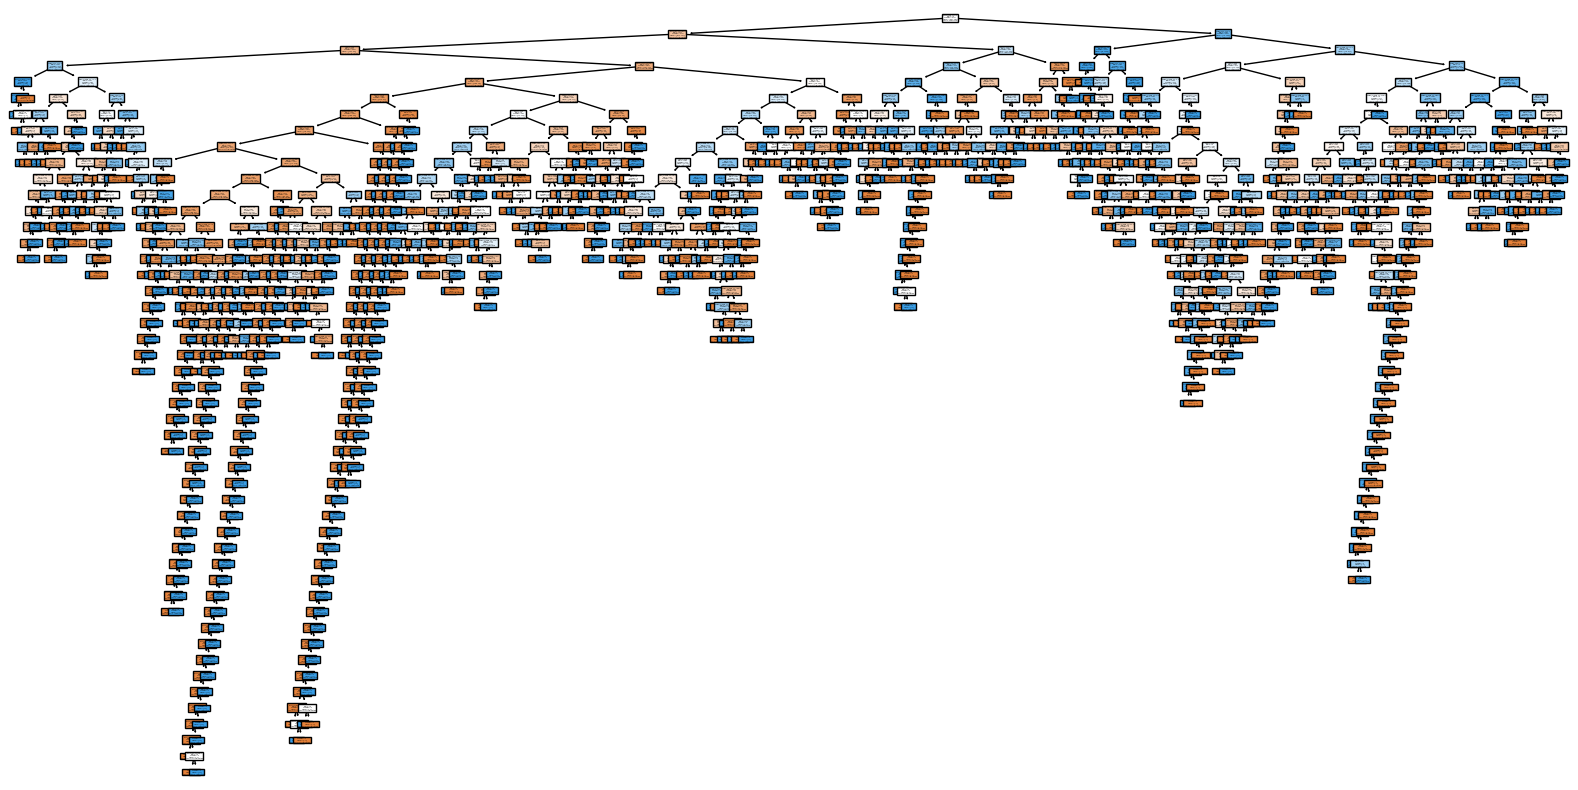

In [27]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=['Not Transported', 'Transported'])
plt.show()

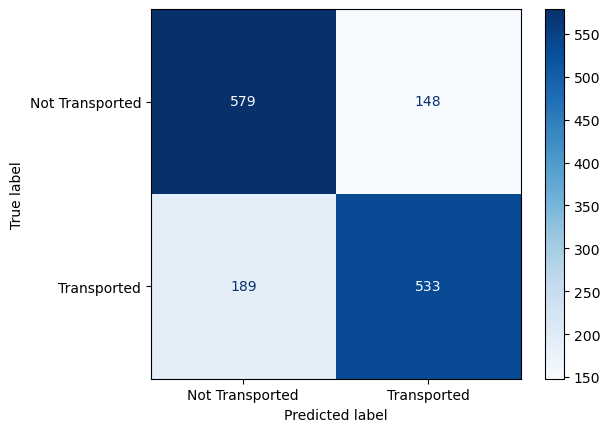

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Transported', 'Transported'])
disp.plot(cmap=plt.cm.Blues)
plt.show()